In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

###Q1 Import the dataset and try to understand what information each column is giving. What is our target variable? Is this a classification or regression problem?

Dataset link: https://drive.google.com/file/d/1A-iAsI3MUU6o9oh5AE1NG1kVU5KD60Ms/view?usp=sharing


In [55]:
#Import dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("drive/MyDrive/heart_study.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


sex : male or female (Nominal)

age : age of the patient (Continuous)

education: maximum level of education of the patient

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

In [56]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [58]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


###Q2. Are there any columns which give information about something totally irrelevant to whether a person has a heart disease or not? If yes, drop the column. Also rename the column 'male' to 'sex_male'.

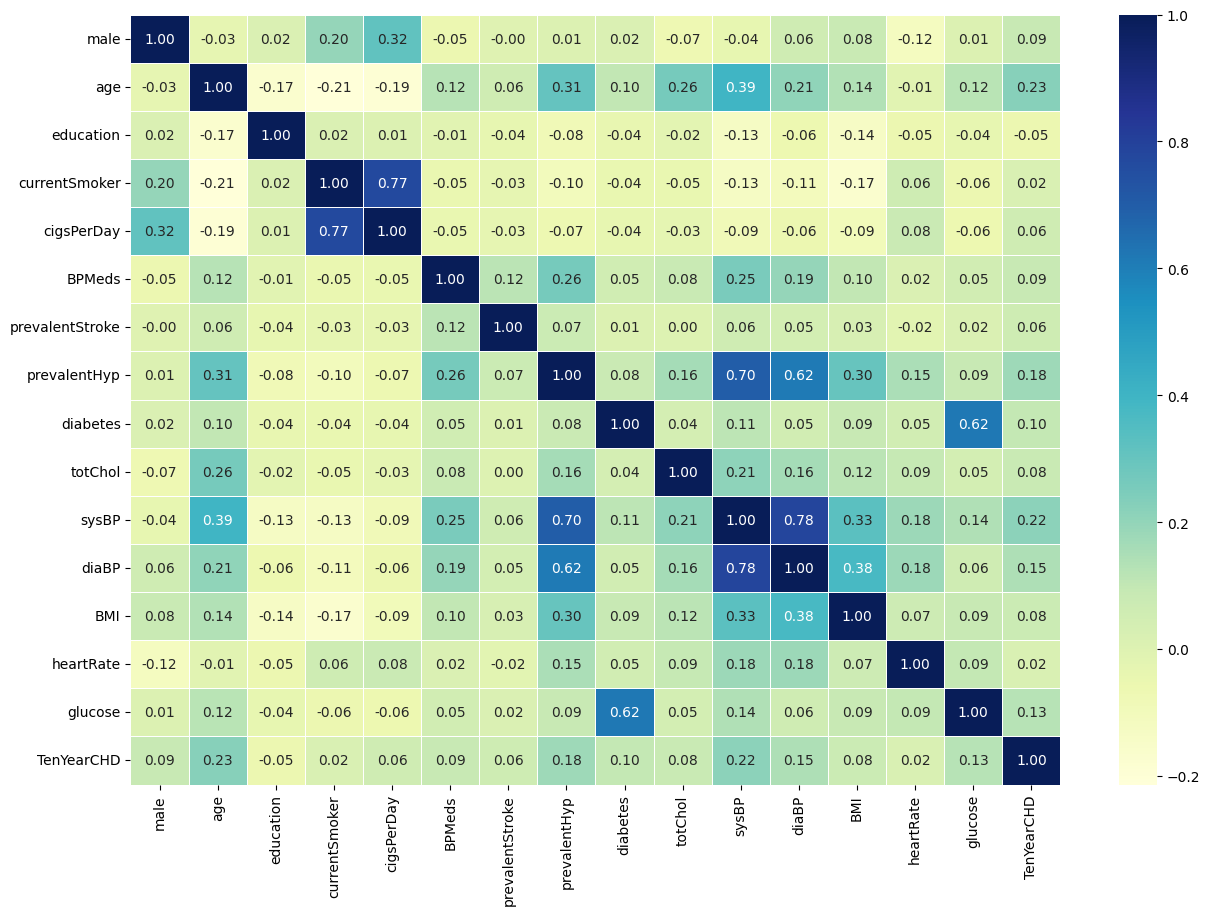

In [59]:
# in order to find out about the correlations with the target variable, we will plot a heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [60]:
#drop columns
df.drop(['education'], axis=1, inplace=True)

In [61]:
#rename column
df.rename(columns={'male':'sex_male'}, inplace = True)

In [62]:
df.head()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


###Q3. Find the number of null values in each column and decide whether you can drop them or not. If you cannot drop them, use an appropriate method to deal with them

In [63]:
df.isnull().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [64]:
#cigsPerDay
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
#glucose
df['glucose'].fillna(df['glucose'].median(), inplace=True)

* cigsPerDay:
Mean (9.005937) is greater than the median (50% percentile is 0.000000), suggesting potential right skewness.
Chose median imputation because cigsPerDay is likely right-skewed.
* glucose:
The large difference between the 75th percentile (87) and the maximum value (394) suggests that there might be outliers in the upper range of the 'glucose' values thus chose median imputation

In [65]:
#totChol
df['totChol'].fillna(df['totChol'].mean(), inplace=True)

#BMI
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

#=heartRate
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)

totChol, BMI, heartRate:
Chose mean imputation as these variables have relatively symmetric distributions.

In [66]:
# BPMeds
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

This is a categorical variable indicating whether the patient was on blood pressure medication. I have replaced the missing values with the mode of this column.

In [67]:
df.isnull().sum()

sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

###Q4. The following code is set up for you, replace 'dataframe' with the name of the your variable. What do you understand from this EDA? Why do some graphs have only two bars, at 0 and 1 and others have multiple?

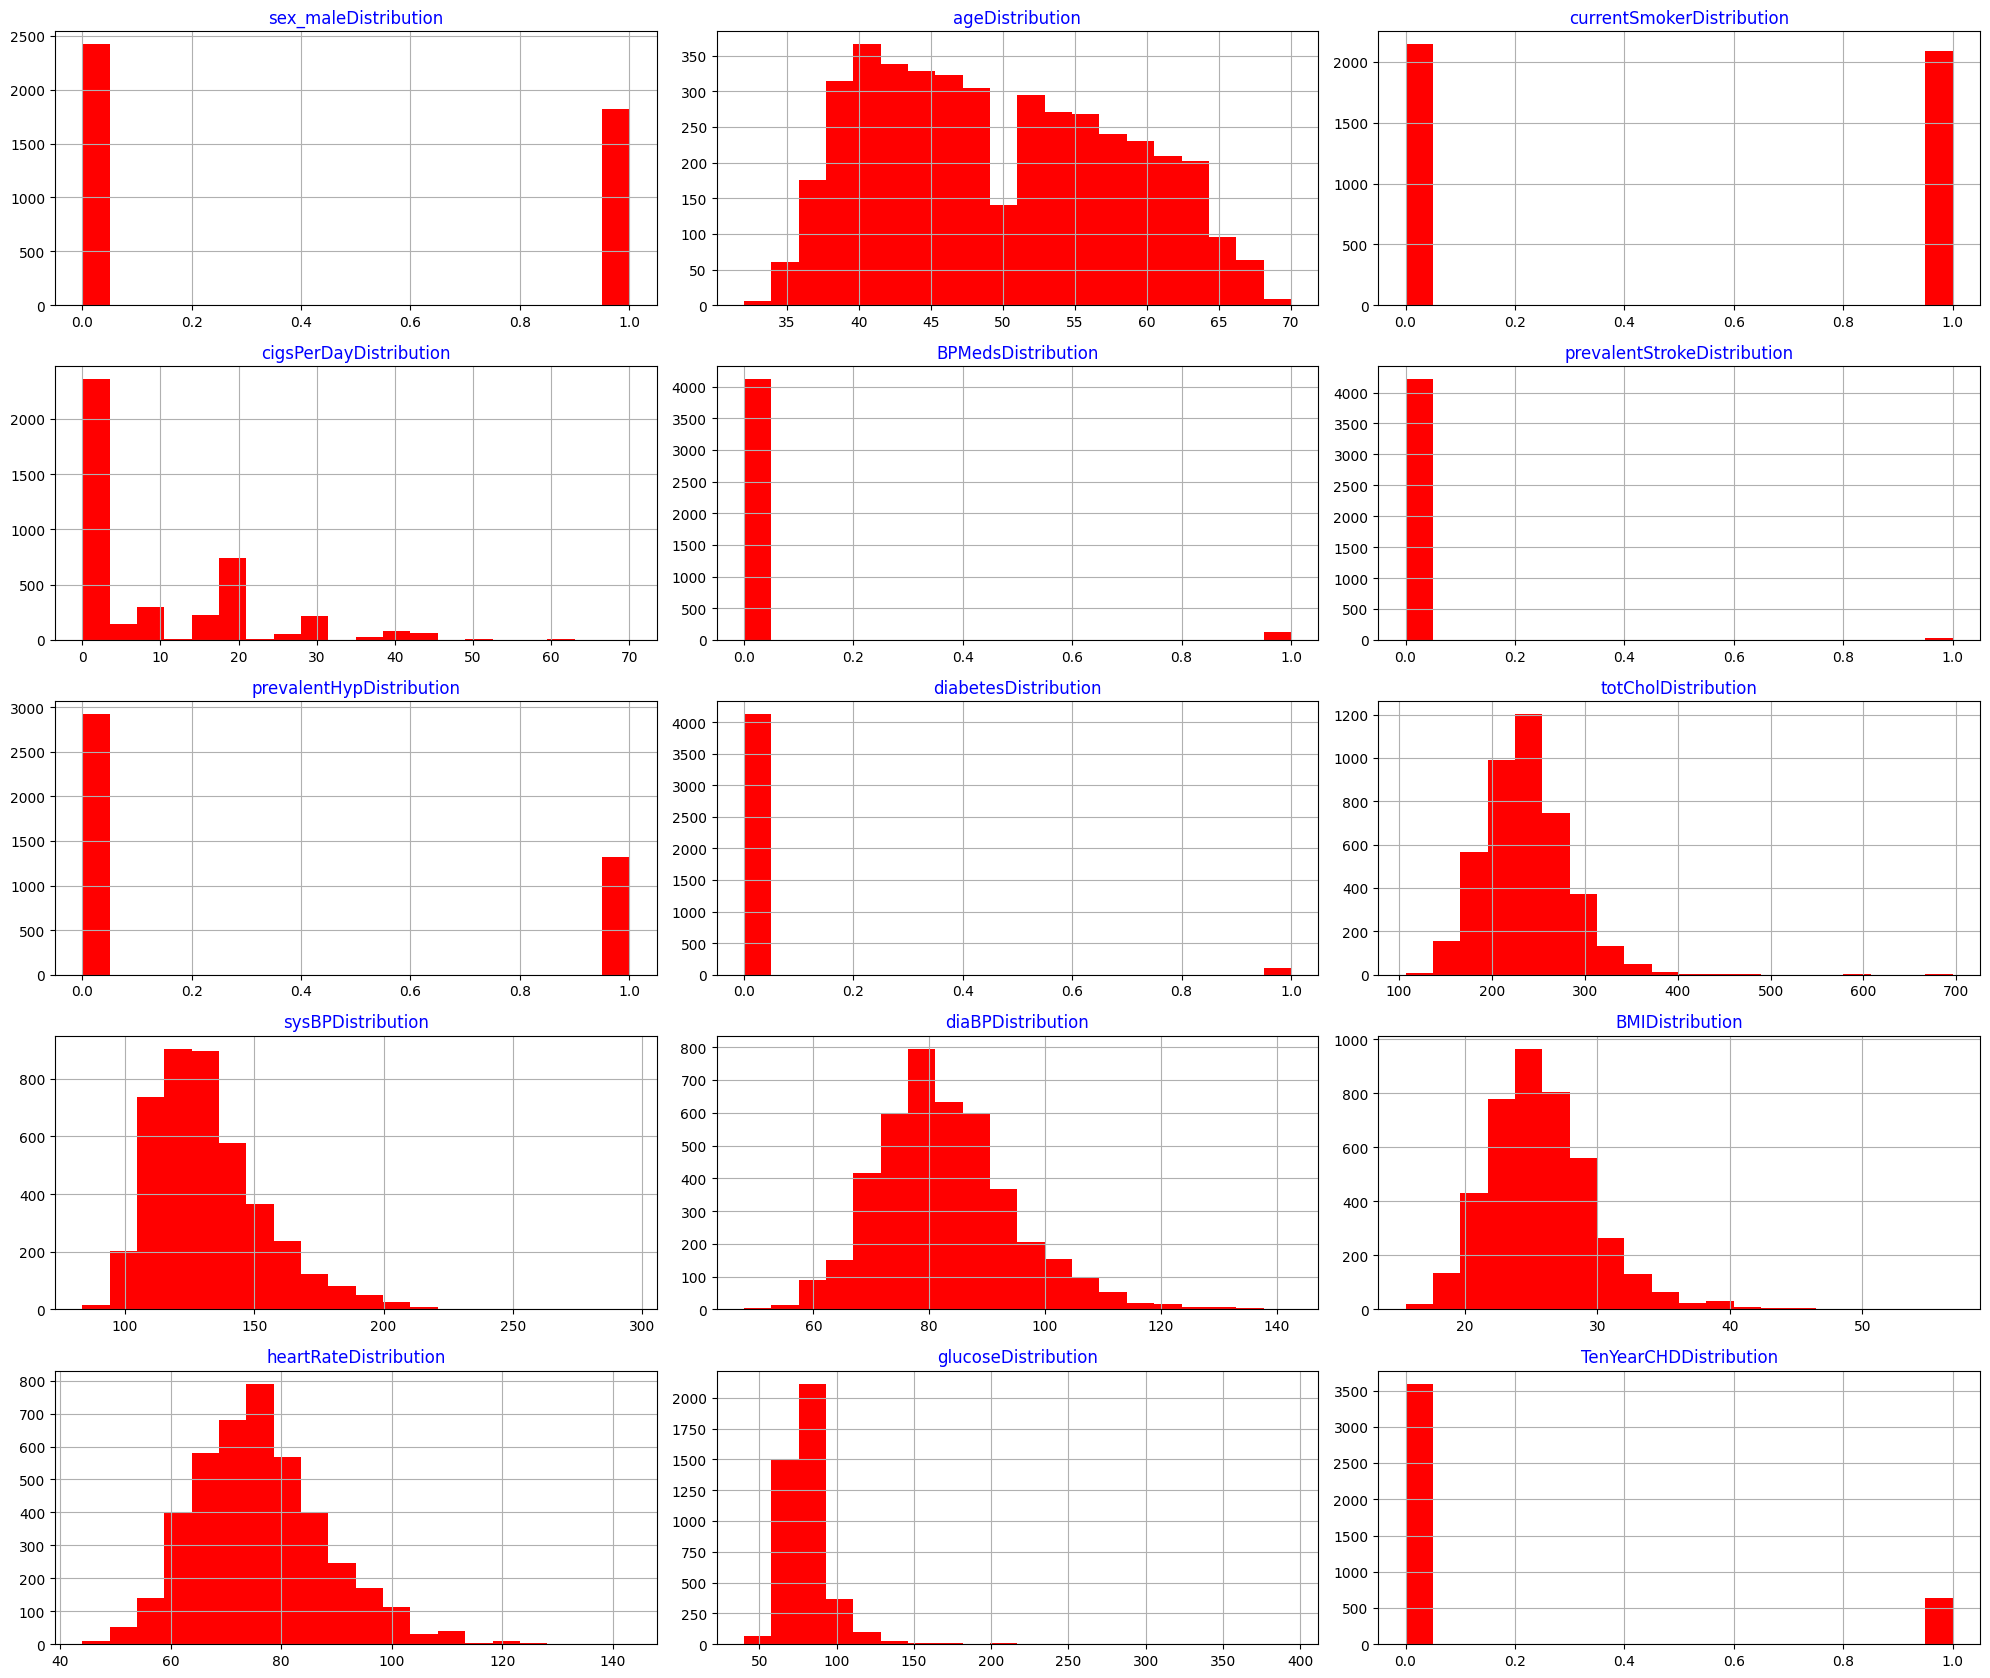

In [51]:
def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

* Features that have only two bars at 0 and 1 likely represent binary or categorical variables with two classes (0 and 1). Examples include 'male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', and 'TenYearCHD'. These features have only two possible values, and the histogram shows the count of each class.
* Features with multiple bars may represent continuous variables with more than two levels. Examples include 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose'. The histogram shows the distribution of values across different bins.

###Q5. Using sns.countplot find out number of Positive cases and Negative cases in the dataset, i.e., in your target column.

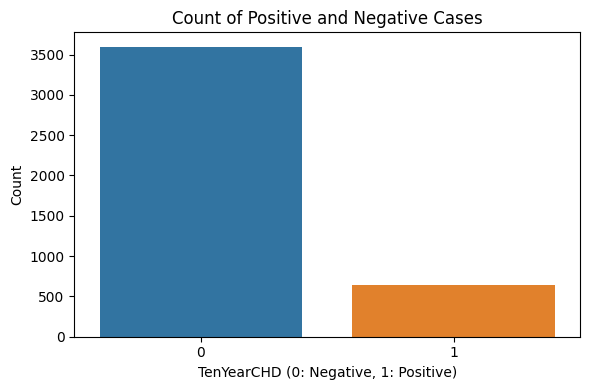

In [68]:
#Code
plt.figure(figsize=(6, 4))
sns.countplot(df, x='TenYearCHD')
plt.xlabel('TenYearCHD (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.title('Count of Positive and Negative Cases')
plt.tight_layout()

In [69]:
positive_count = (df['TenYearCHD'] == 1).sum()
negative_count = (df['TenYearCHD'] == 0).sum()
print(f"Positive Cases: {positive_count}")
print(f"Negative Cases: {negative_count}")

Positive Cases: 644
Negative Cases: 3596


###Q6a. Split the dataset into train and test and fit the training dataset in the Logistic Regression.

In [72]:
#Split the dataset and fit the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
np.random.seed(42)

X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test, y_test)

0.8561320754716981

###Q6b. Does running the above code give a Convergence Warning? What could be the cause of this problem? Try to find out methods that can deal with this problem.

* the issue to the convergence warning can be solved by increasing the maximum number of iterations.

Although there are several methods, we will use backward feature selection to solve this problem. You can learn more about feature selection using the below link.

https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

Understand and run the following 4 cells which carry out backward feature selection for you. Make sure to replace 'df' by your dataframe variable

In [73]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [74]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = df_constant.columns[:-1]
model = sm.Logit(df.TenYearCHD, df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378440
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4225
Method:                           MLE   Df Model:                           14
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                  0.1116
Time:                        08:09:06   Log-Likelihood:                -1604.6
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 2.906e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1758      0.644    -12.698      0.000      -9.438      -6.914
sex_male            0.5029      0.100      5.011      0.000       0.306       0.700
age                 0.0624      0.006     10.111      0.000       0.050       0.074
currentSmoker       0.0149      0.143      0.104      0.917      -0.265       0.295
cigsPerDay          0.0214      0.006      3.792      0.000       0.010       0.032
BPMeds              0.2421      0.220      1.100      0.271      -0.189       0.674
prevalentStroke     0.9656      0.441      2.188      0.029       0.101       1.831
prevalentHyp        0.2298      0.128      1.788      0.074      -0.022       0.482
diabetes            0.1880      0.294      0.639      0.523      -0.389       0.765
totChol             0.0018      0.001      1.779      0.075      -0.000       0.004
sysBP               0.0142      0.004      4.022      0.000       0.007       0.021
diaBP              -0.0030      0.006     -0.506      0.613      -0.015       0.009
BMI                 0.0039      0.012      0.332      0.740      -0.019       0.027
heartRate          -0.0014      0.004     -0.371      0.710      -0.009       0.006
glucose             0.0067      0.002      3.134      0.002       0.003       0.011
===================================================================================
"""

In [75]:
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df_constant, df.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                  0.1091
Time:                        08:09:08   Log-Likelihood:                -1609.1
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 5.270e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4642      0.389    -21.747      0.000      -9.227      -7.701
sex_male            0.4828      0.097      4.966      0.000       0.292       0.673
age                 0.0648      0.006     10.937      0.000       0.053       0.076
cigsPerDay          0.0216      0.004      5.630      0.000       0.014       0.029
prevalentStroke     1.0447      0.436      2.395      0.017       0.190       1.900
sysBP               0.0171      0.002      8.524      0.000       0.013       0.021
glucose             0.0076      0.002      4.662      0.000       0.004       0.011
===================================================================================
"""

In [76]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000098       0.000452    0.000211   0.000
sex_male             1.339436       1.960696    1.620564   0.000
age                  1.054621       1.079399    1.066938   0.000
cigsPerDay           1.014207       1.029606    1.021877   0.000
prevalentStroke      1.208851       6.684146    2.842559   0.017
sysBP                1.013223       1.021203    1.017205   0.000
glucose              1.004410       1.010843    1.007622   0.000


###Q7. The above table mentions the columns with the highest importance. Create a new dataframe with just these columns and your target column. Split it into training and testing dataset and fit the training data into Logistic regression model. Also predict the y values for the test set.

In [77]:
#Split the new dataset and fit the model
model = LogisticRegression(max_iter = 2000)

cols = ['sex_male','cigsPerDay','age','prevalentStroke','sysBP','glucose','TenYearCHD']
df_new = df[cols]

X_new = df_new.drop('TenYearCHD', axis = 1)
y_new = df_new['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test, y_test)

0.8525943396226415

###Q8a. Create a confusion matrix for y test and y predcted values. Since this is prediction of heart disease which metric should be given more importance - Precision or Recall? Justify.

In [81]:
#Code for confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[712   4]
 [121  11]]


* Precision:

   Precision (TP / (TP + FP)) measures the accuracy of positive predictions. High precision is crucial when false positives are costly. In heart disease prediction, high precision means positive predictions are likely correct.

* Recall:

  Recall (TP / (TP + FN)) measures the model's ability to capture all positive instances. Important when false negatives are costly. In heart disease prediction, high recall ensures identification of actual positive cases.

* Decision:

  For heart disease prediction, where missing a positive case (false negative) has severe consequences, Recall is more critical. Minimizing false negatives is crucial to correctly identify cases of heart disease.

###Q8b. Using the above confusion matrix, how would you find out Accuracy, Precision and Recall values. Calculate them using the formulae which takes into account True Positive, False Positive, True Negative and False Negative values.

In [82]:
TN, FP, FN, TP = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8526
Precision: 0.7333
Recall: 0.0833
